Import libraries

In [815]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Suppress warnings from sklearn and np

In [816]:

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

np.set_printoptions(suppress=True)
sns.set(style="whitegrid")

Read database into pd DataFrame object and drop duplicates

In [817]:
df = pd.read_csv('adult2.csv')
df = df.drop_duplicates()

Optional step of stripping trailing whitespace from every value, as original database contains whitespace

In [818]:
'''
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.to_csv("adult2.csv",index=False) #strip trailing whitespace
'''

'\ndf = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)\ndf.to_csv("adult2.csv",index=False) #strip trailing whitespace\n'

Description of data before any processing

In [819]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [820]:
for i in df.columns:
    print(df[i].value_counts())

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
164190    13
123011    13
203488    13
148995    12
113364    12
          ..
138342     1
158040     1
232784     1
325573     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
9     10494
10     7282

Graph of country imbalance

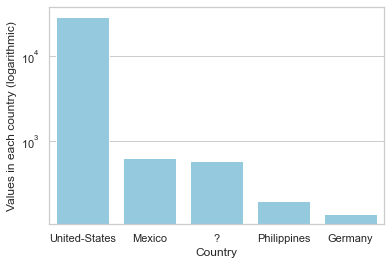

In [821]:
statsdf = df.copy()
totalvals = len(statsdf)
valsarr = []
featurearr = ["Country","Sex","Capital Loss","Capital Gain","Income","Race"]
countries = statsdf["native-country"].value_counts()
countriesmax = countries.max()
valsarr.append((countriesmax/totalvals))
countries = countries.head(5)
sns.barplot(x=countries.index, y=countries.values, color='skyblue')
plt.yscale("log")
plt.ylabel("Values in each country (logarithmic)")
plt.xlabel("Country")
plt.savefig("CountryImbalance")
plt.show()

Graph of sex imbalance

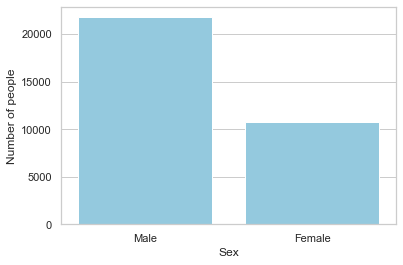

In [822]:
sex = statsdf["sex"].value_counts()
sexmax = sex.max()
valsarr.append((sexmax/totalvals))
sns.barplot(x=sex.index, y=sex.values, color='skyblue')
plt.ylabel("Number of people")
plt.xlabel("Sex")
#plt.savefig("SexImbalance")
plt.show()

Graph showing high number of zeros in capital-loss

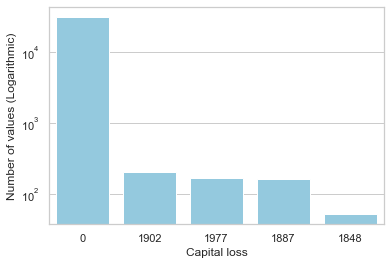

In [823]:
capital_loss = statsdf['capital-loss'].value_counts()
capital_lossmax = capital_loss.max()
valsarr.append((capital_lossmax/totalvals))
capital_loss = capital_loss.head(5)
sns.barplot(x=capital_loss.index.astype(str), y=capital_loss.values, color='skyblue')
plt.ylabel("Number of values (Logarithmic)")
plt.xlabel("Capital loss")
plt.yscale("log")
plt.savefig("CaptialLossGraph")
plt.show()

Graph showing high number of zeros in capital-gain

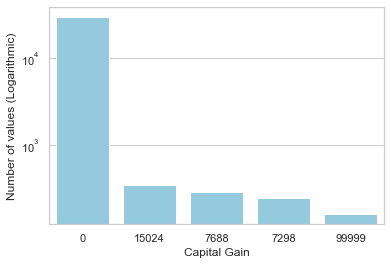

In [824]:
capital_gain = statsdf['capital-gain'].value_counts()
capital_gainmax = capital_gain.max()
valsarr.append((capital_gainmax/totalvals))
capital_gain = capital_gain.head(5)
sns.barplot(x=capital_gain.index.astype(str), y=capital_gain.values, color='skyblue')
plt.ylabel("Number of values (Logarithmic)")
plt.xlabel("Capital Gain")
plt.yscale("log")
plt.savefig("CaptialGainGraph")
plt.show()

Graph showing income imbalance in the dataset

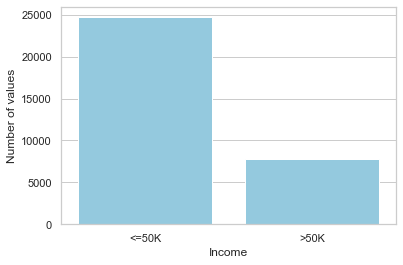

In [825]:
income = statsdf['income'].value_counts()
incomemax = income.max()
valsarr.append((incomemax/totalvals))
sns.barplot(x=income.index, y=income.values, color='skyblue')
plt.ylabel("Number of values")
plt.xlabel("Income")
plt.savefig("IncomeGraph",bbox_bounds="tight")
plt.show()

Graph showing race inequality

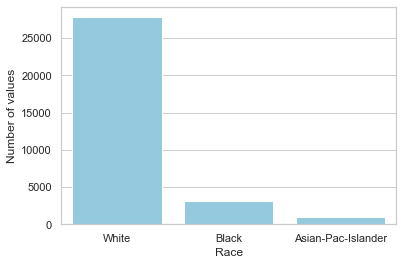

In [826]:
race = statsdf['race'].value_counts()
racemax = race.max()
valsarr.append((racemax/totalvals))
race = race.head(3)
sns.barplot(x=race.index, y=race.values, color='skyblue')
plt.ylabel("Number of values")
plt.xlabel("Race")
plt.savefig("RaceGraph")
plt.show()

Showing a graph of the percentage of each maximum category

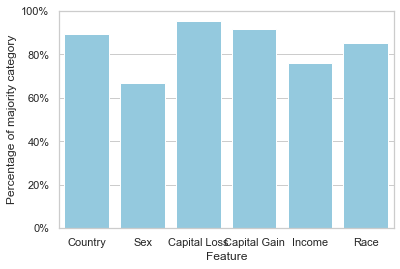

In [827]:
graphdf = pd.DataFrame({"Percentage of majority category":valsarr,"Feature":featurearr})
def percentage_formatter(x, pos):
    return f'{x:.0%}'
sns.barplot(x='Feature', y='Percentage of majority category',data=graphdf,orient='v',color='skyblue')
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.savefig("ImbalanceGraph")
plt.show()

Drop education-num as it is an extension of education and we will be mapping education and relationship to more discrete groups.

In [828]:
df = df.drop("education-num",axis=1)

education_mapping = {
    'Doctorate': 'phd',
    'Prof-school': 'masters',
    'Masters': 'masters',
    'Bachelors': 'bachelors',
    'Some-college': 'college',
    'Assoc-voc': 'college',
    'Assoc-acdm': 'college',
    'HS-Grad': 'hs',
    'HS-grad': 'hs',
    '9th': 'none',
    '7th-8th': 'none',
    '5th-6th': 'none',
    '1st-4th': 'none',
    '12th': 'none',
    '11th': 'none',
    '10th': 'none',
    'Preschool': 'none'
}

marital_status_mapping = {
    'Never-married': 'not_married',
    'Married-spouse-absent': 'not_married',
    'Married-AF-spouse': 'married',
    'Married-civ-spouse': 'married',
    'Separated': 'separated',
    'Divorced': 'separated',
    'Widowed': 'widowed'
}

df['education'].replace(education_mapping, inplace=True)
df['marital-status'].replace(marital_status_mapping, inplace=True)

Convert categorical data and remove missing values as we cannot make a meaningful prediction with them
Most of the missing values lie in workclass and relationship, those values will add ambiguity when predicting income.

In [829]:
df = df.replace('?',np.nan)
print(df.isnull().sum())
df = df.dropna()

age                  0
workclass         1836
fnlwgt               0
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64


Effect of scaling data

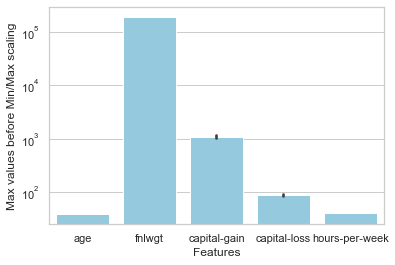

In [830]:
df_to_scale = df[["age","fnlwgt","capital-gain","capital-loss","hours-per-week"]].copy()
sns.barplot(data=df_to_scale, color="skyblue")
plt.xlabel("Features")
plt.ylabel("Max values before Min/Max scaling")
plt.yscale("log")
plt.savefig("ValuesBeforeStandardisation")

plt.show()


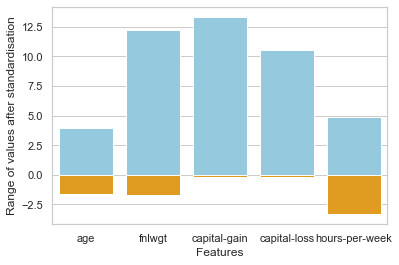

In [831]:
temp_scaler = StandardScaler()
df_to_scale = temp_scaler.fit_transform(df_to_scale)
maxvals = np.max(df_to_scale,axis=0)
minvals = np.min(df_to_scale,axis=0)

final = np.dstack((maxvals,minvals))

sns.barplot(x=["age","fnlwgt","capital-gain","capital-loss","hours-per-week"], y=maxvals, color='skyblue', label='Max Value')
sns.barplot(x=["age","fnlwgt","capital-gain","capital-loss","hours-per-week"], y=minvals, color='orange', label='Min Value')

plt.xlabel('Features')
plt.ylabel('Range of values after standardisation')
plt.savefig("ValuesAfterStandardisation")
plt.show()



Label encode categorical data to numerical data and then one-hot encode everything except for income and sex as they are binary variables.
Define our features and targets as X and y.

In [832]:

labelenc = LabelEncoder()
encoder = OneHotEncoder()

columns_to_encode = ['workclass', 'education', 'occupation', 'relationship', 
                      'marital-status', 'race', 'sex', 'native-country', 'income']
columns_to_encode_one_hot = ['workclass', 'education', 'occupation', 'relationship', 
                      'marital-status', 'race', 'native-country']


for column in columns_to_encode:
    df[column] = labelenc.fit_transform(df[column])

one_hot_encoded_cols = {}
for column in columns_to_encode_one_hot:
    one_hot_encoded_cols[column] = encoder.fit_transform(df[[column]]).toarray()


y = df['income'].values

X_columns = ['age', 'workclass', 'marital-status', 'occupation', 'relationship',
             'race', 'sex', 'capital-gain', 'capital-loss', 'native-country', 'fnlwgt', 'hours-per-week']

X = pd.DataFrame(index=df.index)

for column in X_columns:
    if column in columns_to_encode_one_hot:

        one_hot_encoded_df = pd.DataFrame(one_hot_encoded_cols[column], columns=[f"{column}_{i}" for i in range(one_hot_encoded_cols[column].shape[1])], index=df.index)
        X = pd.concat([X, one_hot_encoded_df], axis=1)
    else:
        X[column] = df[column]


Split our data and scale training and test sets

In [833]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2,random_state=42)
scaler = StandardScaler()


X_train[["age","fnlwgt","capital-gain","capital-loss","hours-per-week"]] = scaler.fit_transform(X_train[["age","fnlwgt","capital-gain","capital-loss","hours-per-week"]])

X_test[["age","fnlwgt","capital-gain","capital-loss","hours-per-week"]] = scaler.transform(X_test[["age","fnlwgt","capital-gain","capital-loss","hours-per-week"]])

Get a baseline score for both models (default hyperparameters)

In [834]:
nb_model = GaussianNB()
rfc_model = RandomForestClassifier()

nb_model.fit(X_train,y_train)
rfc_model.fit(X_train,y_train)

y_pred = nb_model.predict(X_test)
y_pred2 = rfc_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy2 = accuracy_score(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
classification_rep2 = classification_report(y_test, y_pred2)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

print(f'Accuracy: {accuracy2}')
print(f'Confusion Matrix:\n{conf_matrix2}')
print(f'Classification Report:\n{classification_rep2}')

Accuracy: 0.5486065029860651
Confusion Matrix:
[[1817 2668]
 [  53 1490]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.41      0.57      4485
           1       0.36      0.97      0.52      1543

    accuracy                           0.55      6028
   macro avg       0.67      0.69      0.55      6028
weighted avg       0.81      0.55      0.56      6028

Accuracy: 0.8405773059057731
Confusion Matrix:
[[4129  356]
 [ 605  938]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4485
           1       0.72      0.61      0.66      1543

    accuracy                           0.84      6028
   macro avg       0.80      0.76      0.78      6028
weighted avg       0.83      0.84      0.84      6028



Heatmaps for both models with baseline hyperparameters

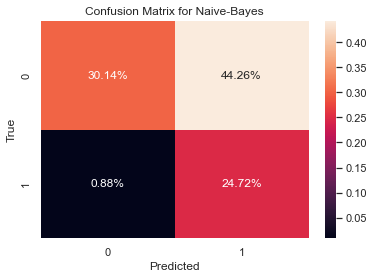

In [835]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt=".2%")
plt.xlabel('Predicted')
plt.ylabel('True')

plt.title('Confusion Matrix for Naive-Bayes')
plt.show()

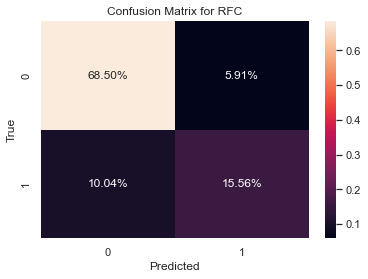

In [836]:
sns.heatmap(conf_matrix2/np.sum(conf_matrix2), annot=True, fmt=".2%")
plt.xlabel('Predicted')
plt.ylabel('True')

plt.title('Confusion Matrix for RFC')
plt.show()

Perform 5-fold cross validation and ideal hyperparameters for each model.

RFC (proposed model):

In [837]:
rfc_model = RandomForestClassifier()

cv = KFold(n_splits=5,shuffle=True, random_state=42)

param_grid_rfc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'log2'],
}

grid_search = RandomizedSearchCV(rfc_model, param_grid_rfc, cv=cv, scoring='accuracy')
grid_search.fit(X_train,y_train)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.853967 using {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}
0.853262 (0.006411) with: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None}
0.849322 (0.006427) with: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10}
0.852640 (0.006858) with: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}
0.838622 (0.007651) with: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
0.853221 (0.007058) with: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20}
0.849156 (0.007670) with: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}
0.849156 (0.005445) with: {'n_estimators': 50

Gaussian Naive-Bayes (baseline model):

In [838]:
nb_model = GaussianNB()

cv2 = KFold(n_splits=5,shuffle=True, random_state=42)

param_grid = {
    'priors': [None], 
    'var_smoothing': [1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4, 1e-3,1e-2,1e-1,1,10,100,1000]
}

grid_search2 = GridSearchCV(nb_model, param_grid, cv=cv2, scoring='accuracy')
grid_search2.fit(X_train, y_train)

print("Best: %f using %s" % (grid_search2.best_score_, grid_search2.best_params_))

means = grid_search2.cv_results_['mean_test_score']
stds = grid_search2.cv_results_['std_test_score']
params = grid_search2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.779064 using {'priors': None, 'var_smoothing': 1}
0.456637 (0.035495) with: {'priors': None, 'var_smoothing': 1e-12}
0.475467 (0.028594) with: {'priors': None, 'var_smoothing': 1e-11}
0.490274 (0.026141) with: {'priors': None, 'var_smoothing': 1e-10}
0.507859 (0.025100) with: {'priors': None, 'var_smoothing': 1e-09}
0.525485 (0.025321) with: {'priors': None, 'var_smoothing': 1e-08}
0.551034 (0.023624) with: {'priors': None, 'var_smoothing': 1e-07}
0.576044 (0.022711) with: {'priors': None, 'var_smoothing': 1e-06}
0.615859 (0.025559) with: {'priors': None, 'var_smoothing': 1e-05}
0.676081 (0.019930) with: {'priors': None, 'var_smoothing': 0.0001}
0.743354 (0.006661) with: {'priors': None, 'var_smoothing': 0.001}
0.776202 (0.005161) with: {'priors': None, 'var_smoothing': 0.01}
0.777529 (0.008010) with: {'priors': None, 'var_smoothing': 0.1}
0.779064 (0.005230) with: {'priors': None, 'var_smoothing': 1}
0.757289 (0.003789) with: {'priors': None, 'var_smoothing': 10}
0.752686 (0.0

Plot accuracy against smoothing on a logarithmic graph

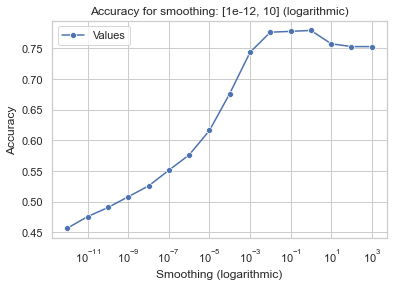

In [839]:
results_nb = grid_search2.cv_results_
y_values_nb = results_nb["mean_test_score"]
x_values_nb = param_grid['var_smoothing']

sns.set(style="whitegrid")

#plt.figure(figsize=(10, 6)) 
sns.lineplot(x=x_values_nb, y=y_values_nb, marker="o", label="Values")
plt.xscale("log")

plt.xlabel("Smoothing (logarithmic)")
plt.ylabel("Accuracy")
plt.title("Accuracy for smoothing: [1e-12, 10] (logarithmic)")

plt.savefig("GaussianNBTuningGraph",bbox_inches="tight")
plt.show()



Evaluate model with ideal hyperparameters

In [840]:
rfc_model = RandomForestClassifier(**grid_search.best_params_)

rfc_model.fit(X_train, y_train)
nb_model = GaussianNB(**grid_search2.best_params_)
nb_model.fit(X_train,y_train)

y_pred = nb_model.predict(X_test)
y_pred2 = rfc_model.predict(X_test)


# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy2 = accuracy_score(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
classification_rep2 = classification_report(y_test, y_pred2)

# Display results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

print(f'Accuracy: {accuracy2}')
print(f'Confusion Matrix:\n{conf_matrix2}')
print(f'Classification Report:\n{classification_rep2}')

Accuracy: 0.7723954877239548
Confusion Matrix:
[[4382  103]
 [1269  274]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.86      4485
           1       0.73      0.18      0.29      1543

    accuracy                           0.77      6028
   macro avg       0.75      0.58      0.58      6028
weighted avg       0.76      0.77      0.72      6028

Accuracy: 0.8565029860650298
Confusion Matrix:
[[4212  273]
 [ 592  951]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4485
           1       0.78      0.62      0.69      1543

    accuracy                           0.86      6028
   macro avg       0.83      0.78      0.80      6028
weighted avg       0.85      0.86      0.85      6028



Heatmaps for both models

Feature importance for RFC

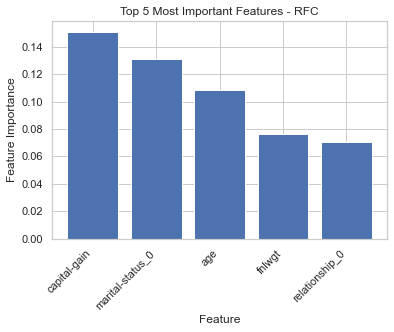

In [841]:
importance = rfc_model.feature_importances_
indices = np.argsort(importance)[::-1]
top_indices = indices[:5]

# Plot the top 5 feature importances
plt.bar(range(5), importance[top_indices], align="center")
plt.xticks(range(5), X_train.columns[top_indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Top 5 Most Important Features - RFC")
plt.savefig("FeatureImportanceRFC",bbox_inches="tight")
plt.show()

marital_status_0 = married, marital_status_1 = not married, relationship_0 = husband

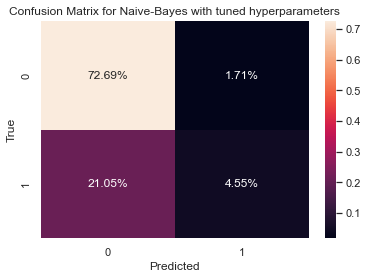

In [842]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt=".2%")
plt.xlabel('Predicted')
plt.ylabel('True')

plt.title('Confusion Matrix for Naive-Bayes with tuned hyperparameters')
plt.savefig('NBPostTuningConfusionMatrix')
plt.show()

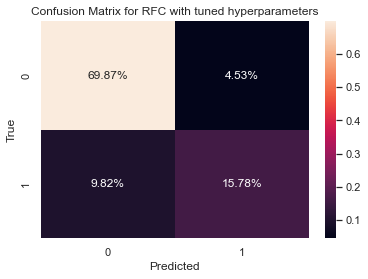

In [843]:
sns.heatmap(conf_matrix2/np.sum(conf_matrix2), annot=True, fmt=".2%")
plt.xlabel('Predicted')
plt.ylabel('True')

plt.title('Confusion Matrix for RFC with tuned hyperparameters')
plt.savefig('RFCTunedConfusionMatrix')
plt.show()